# Image Coloring with U-Net and GAN

# Dependencies

In [ ]:
# model stuff
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

# data stuff
from PIL import Image
from skimage.color import rgb2lab, lab2rgb
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

# other stuff
import math
import numpy as np
import random
import time

from collections import deque, namedtuple
from itertools import count

import sys
import matplotlib.pyplot as plt

# Setup

In [ ]:
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/gdrive')
    path = '/content/gdrive/My Drive/RL Project/Models/'
else:
    path = '/home/bowass/Documents/University/year3/Winter/DL/project'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [ ]:
# speed up conv. computation
torch.backends.cudnn.benchmark = True

# Utils

In [ ]:
def split_indices(n_samples):
    # randomly split indices to train (70%), val (10%) and test (20%)
    val_indices = list(np.random.choice(n_samples, int(n_samples*0.1)))
    marked_indices = np.zeros(n_samples, dtype=int)
    marked_indices[val_indices] = 1
    left_indices = [i for i in range(n_samples) if marked_indices[i] != 1]
    test_indices = (np.random.choice(left_indices, int(n_samples*0.2)))
    marked_indices[test_indices] = 1
    train_indices = [i for i in range(n_samples) if marked_indices[i] != 1]
    return train_indices, val_indices, test_indices

# Data Preparation

In [ ]:
import urllib.request
import tarfile
import os
import matplotlib.pyplot as plt

compressed_file_url = "https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz"

# extracted_dir = "/content/flower_images/"
extracted_dir = "/content/gdrive/My Drive/ML_hw_23-24/project/"

if not os.path.exists(extracted_dir):
    os.makedirs(extracted_dir)

compressed_file_path, _ = urllib.request.urlretrieve(compressed_file_url)

with tarfile.open(compressed_file_path, 'r:gz') as tar:
    tar.extractall(path=extracted_dir)

# Directory containing the images
image_dir = os.path.join(extracted_dir, "jpg")

paths = os.listdir(image_dir)

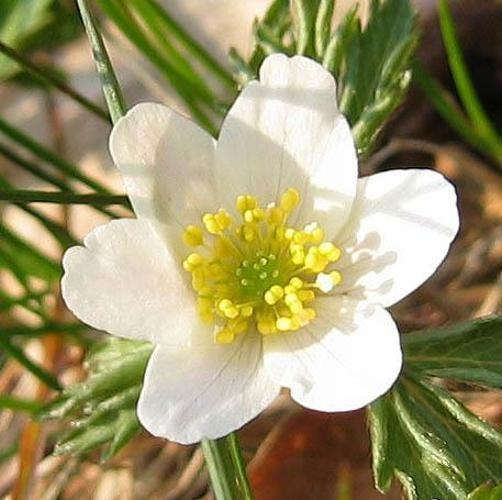

In [ ]:
# example image
first_image_path = os.path.join(image_dir, paths[5])
img = Image.open(first_image_path)
img

In [ ]:
SIZE = 256

class ColorizationDataset(Dataset):
    def __init__(self, image_dir, paths, name=None, transforms=None):
        # self.transforms = transforms.Resize((SIZE, SIZE), Image.BICUBIC)
        self.transforms = transforms
        self.size = SIZE
        self.image_dir = image_dir
        self.paths = paths
        self.name = name

    def __getitem__(self, idx):
        path = os.path.join(self.image_dir, self.paths[idx])
        img = Image.open(path).convert("RGB")
        img = np.array(self.transforms(img))
        img_lab = rgb2lab(img).astype("float32")
        img_lab = transforms.ToTensor()(img_lab)
        L = img_lab[[0], ...] / 50. - 1.  # scaling between -1 and 1
        ab = img_lab[[1, 2], ...] / 110.  # scaling between -1 and 1

        return {'L': L, 'ab': ab}

    def __len__(self):
        return len(self.paths)

In [ ]:
trans = transforms.Resize((SIZE, SIZE), Image.BICUBIC)

In [ ]:
# train-val-test split
# TODO: implement it better.
n_samples = len(paths)
train_indices, val_indices, test_indices = split_indices(n_samples)
train_paths = [paths[i] for i in train_indices]
test_paths = [paths[i] for i in test_indices]
val_paths = [paths[i] for i in val_indices]

In [ ]:
train_loader = ColorizationDataset(image_dir, train_paths, name='train', transforms=trans)
test_loader = ColorizationDataset(image_dir, train_paths, name='test', transforms=trans)
val_loader = ColorizationDataset(image_dir, train_paths, name='val', transforms=trans)

In [ ]:
# example img
next(iter(train_loader))

{'L': tensor([[[-0.8156, -0.8156, -0.8156,  ..., -0.7908, -0.8005, -0.8005],
          [-0.8358, -0.8358, -0.8358,  ..., -0.7908, -0.7812, -0.7812],
          [-0.8367, -0.8367, -0.8367,  ..., -0.7908, -0.7716, -0.7716],
          ...,
          [-0.4523, -0.3837, -0.3309,  ..., -0.4719, -0.5508, -0.6242],
          [-0.4702, -0.4300, -0.3786,  ..., -0.5269, -0.5803, -0.6545],
          [-0.5101, -0.4631, -0.3755,  ..., -0.5584, -0.6176, -0.7016]]]),
 'ab': tensor([[[-0.0316, -0.0316, -0.0316,  ...,  0.0700,  0.0707,  0.0707],
          [-0.0312, -0.0312, -0.0312,  ...,  0.0700,  0.0694,  0.0694],
          [-0.0342, -0.0342, -0.0342,  ...,  0.0700,  0.0687,  0.0687],
          ...,
          [-0.1633, -0.1629, -0.1556,  ..., -0.0771, -0.1042, -0.1080],
          [-0.1391, -0.1478, -0.1473,  ..., -0.0844, -0.1124, -0.1179],
          [-0.1032, -0.1191, -0.1389,  ..., -0.0987, -0.1169, -0.1207]],
 
         [[ 0.0611,  0.0611,  0.0611,  ...,  0.1100,  0.1072,  0.1072],
          [ 0.057

# Model

In [ ]:
class UNet(nn.Module):
    pass

# Train

# Test